# **HAND WRITTEN DIGITS CLASSIFIER USING AN MLP**

This project aims to develop a multilayer perceptron that is capable of identifying handwritten digits from 0 to 9.


The MNIST dataset is a widely used collection of handwritten digits that is commonly employed for training various machine learning algorithms, especially in the field of computer vision. MNIST stands for Modified National Institute of Standards and Technology database. It consists of 60,000 training images and 10,000 test images, each containing grayscale images of handwritten digits from 0 to 9. The images are 28x28 pixels in size, making them relatively small and easy to work with computationally. MNIST has been a benchmark dataset in the field of machine learning for evaluating and comparing the performance of different algorithms in tasks like classification and digit recognition.

In [1]:
# imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
%matplotlib inline

In [2]:
# Define transformations to be applied to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Display the size of the dataset
print("Training data size:", len(train_dataset))
print("Test data size:", len(test_dataset))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 46616231.08it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1597105.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13326418.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2888632.11it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data size: 60000
Test data size: 10000


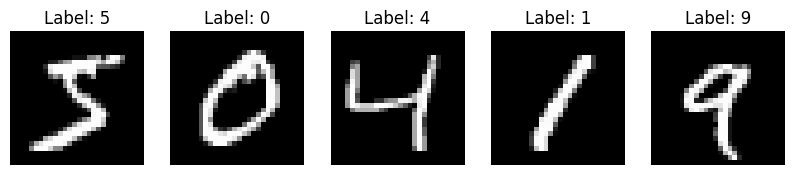

In [3]:
# Get 5 random samples from the training dataset
samples = [train_dataset[i] for i in range(5)]

# Plot the samples
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image, label = samples[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

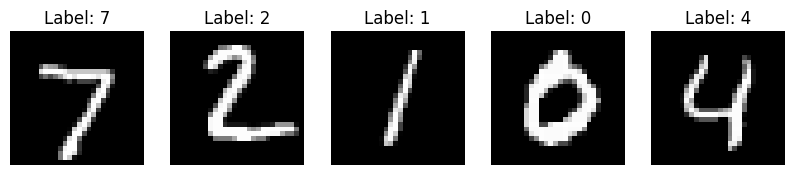

In [4]:
# Get 5 random samples from the test dataset
samples = [test_dataset[i] for i in range(5)]

# Plot the samples
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image, label = samples[i]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

In [5]:
# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(5):  # Adjust the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.211
[1,   200] loss: 1.902
[1,   300] loss: 1.371
[1,   400] loss: 0.944
[1,   500] loss: 0.730
[1,   600] loss: 0.623
[1,   700] loss: 0.546
[1,   800] loss: 0.477
[1,   900] loss: 0.467
[2,   100] loss: 0.428
[2,   200] loss: 0.411
[2,   300] loss: 0.395
[2,   400] loss: 0.386
[2,   500] loss: 0.376
[2,   600] loss: 0.355
[2,   700] loss: 0.363
[2,   800] loss: 0.360
[2,   900] loss: 0.340
[3,   100] loss: 0.356
[3,   200] loss: 0.325
[3,   300] loss: 0.318
[3,   400] loss: 0.332
[3,   500] loss: 0.324
[3,   600] loss: 0.321
[3,   700] loss: 0.288
[3,   800] loss: 0.309
[3,   900] loss: 0.297
[4,   100] loss: 0.291
[4,   200] loss: 0.309
[4,   300] loss: 0.278
[4,   400] loss: 0.285
[4,   500] loss: 0.305
[4,   600] loss: 0.284
[4,   700] loss: 0.283
[4,   800] loss: 0.278
[4,   900] loss: 0.279
[5,   100] loss: 0.265
[5,   200] loss: 0.249
[5,   300] loss: 0.268
[5,   400] loss: 0.255
[5,   500] loss: 0.280
[5,   600] loss: 0.276
[5,   700] loss: 0.234
[5,   800] 

In [9]:
# Evaluate the model on test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 93 %
